In [3]:
#Description: A simple moving average trading strategy using python

In [5]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
from google.colab import files
files.upload()

Saving AAPL.csv to AAPL.csv


{'AAPL.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2020-11-27,116.570000,117.489998,116.220001,116.589996,115.875641,46691300\n2020-11-30,116.970001,120.970001,116.809998,119.050003,118.320580,169410200\n2020-12-01,121.010002,123.470001,120.010002,122.720001,121.968094,127728200\n2020-12-02,122.019997,123.370003,120.889999,123.080002,122.325897,89004200\n2020-12-03,123.519997,123.779999,122.209999,122.940002,122.186745,78967600\n2020-12-04,122.599998,122.860001,121.519997,122.250000,121.500977,78260400\n2020-12-07,122.309998,124.570000,122.250000,123.750000,122.991783,86712000\n2020-12-08,124.370003,124.980003,123.089996,124.379997,123.617928,82225500\n2020-12-09,124.529999,125.949997,121.000000,121.779999,121.033844,115089200\n2020-12-10,120.500000,123.870003,120.150002,123.239998,122.484901,81312200\n2020-12-11,122.430000,122.760002,120.550003,122.410004,121.659988,86939800\n2020-12-14,122.599998,123.349998,121.540001,121.779999,121.033844,79184500\n2020-12-15,124.339996,127.9

In [8]:
#Store the data
df = pd.read_csv('AAPL.csv')
#Set date as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#Show data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-11-27,2020-11-27,116.570000,117.489998,116.220001,116.589996,115.875641,46691300
2020-11-30,2020-11-30,116.970001,120.970001,116.809998,119.050003,118.320580,169410200
2020-12-01,2020-12-01,121.010002,123.470001,120.010002,122.720001,121.968094,127728200
2020-12-02,2020-12-02,122.019997,123.370003,120.889999,123.080002,122.325897,89004200
2020-12-03,2020-12-03,123.519997,123.779999,122.209999,122.940002,122.186745,78967600
...,...,...,...,...,...,...,...
2021-11-19,2021-11-19,157.649994,161.020004,156.529999,160.550003,160.550003,117147500
2021-11-22,2021-11-22,161.679993,165.699997,161.000000,161.020004,161.020004,117467900
2021-11-23,2021-11-23,161.119995,161.800003,159.059998,161.410004,161.410004,96041900
2021-11-24,2021-11-24,160.750000,162.139999,159.639999,161.940002,161.940002,69463600


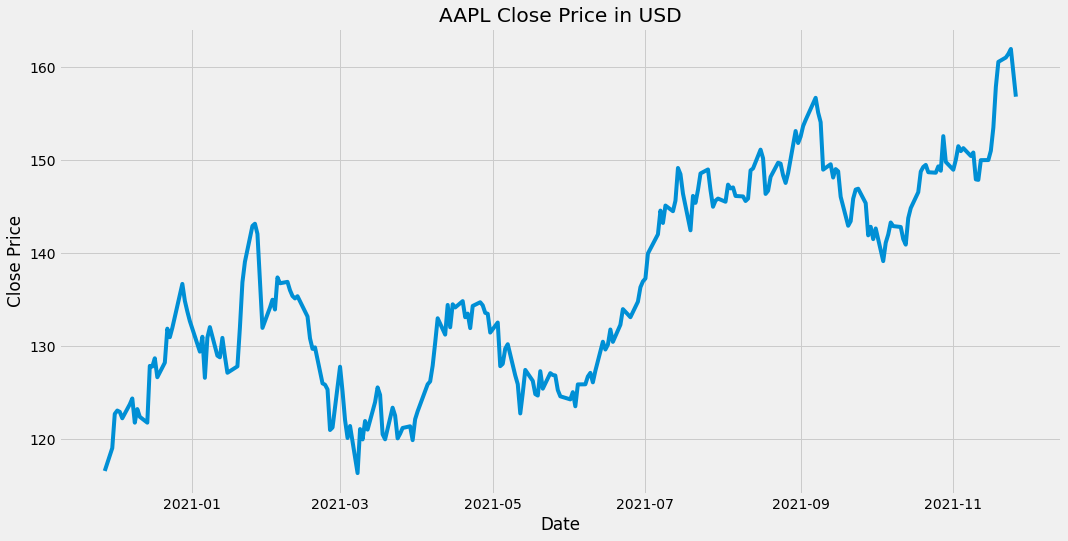

In [10]:
#Visulaize close price
plt.figure(figsize=(16,8))
plt.title('AAPL Close Price in USD')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [11]:
#Function to calculate simple moving average
def SMA(data, period = 30, column='Close'):
  return data[column].rolling(window=period).mean()

In [12]:
df['SMA30'] = SMA(df)

In [13]:
#Show data
df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA30
2020-11-27,2020-11-27,116.570000,117.489998,116.220001,116.589996,115.875641,46691300,NaN
2020-11-30,2020-11-30,116.970001,120.970001,116.809998,119.050003,118.320580,169410200,NaN
2020-12-01,2020-12-01,121.010002,123.470001,120.010002,122.720001,121.968094,127728200,NaN
2020-12-02,2020-12-02,122.019997,123.370003,120.889999,123.080002,122.325897,89004200,NaN
2020-12-03,2020-12-03,123.519997,123.779999,122.209999,122.940002,122.186745,78967600,NaN
...,...,...,...,...,...,...,...,...
2021-11-19,2021-11-19,157.649994,161.020004,156.529999,160.550003,160.550003,117147500,149.280001
2021-11-22,2021-11-22,161.679993,165.699997,161.000000,161.020004,161.020004,117467900,149.887001
2021-11-23,2021-11-23,161.119995,161.800003,159.059998,161.410004,161.410004,96041900,150.550335
2021-11-24,2021-11-24,160.750000,162.139999,159.639999,161.940002,161.940002,69463600,151.251335


In [17]:
def strategy(df):
  buy = []
  sell = []
  flag = 0
  buy_price = 0

  for i in range(0, len(df)):
    if df['SMA30'][i] > df['Close'][i] and flag == 0:
      buy.append(df['Close'][i])
      sell.append(np.nan)
      buy_price = df['Close'][i]
      flag = 1
    elif df['SMA30'][i] < df['Close'][i] and flag == 1 and buy_price < df['Close'][i]:
      sell.append(df['Close'][i])
      buy.append(np.nan)
      buy_price = 0
      flag = 0
    else: 
      sell.append(np.nan)
      buy.append(np.nan)
  return (buy, sell)

In [18]:
#Get buy and sell list
strat = strategy(df)
df['Buy'] = strat[0]
df['Sell'] = strat[1]

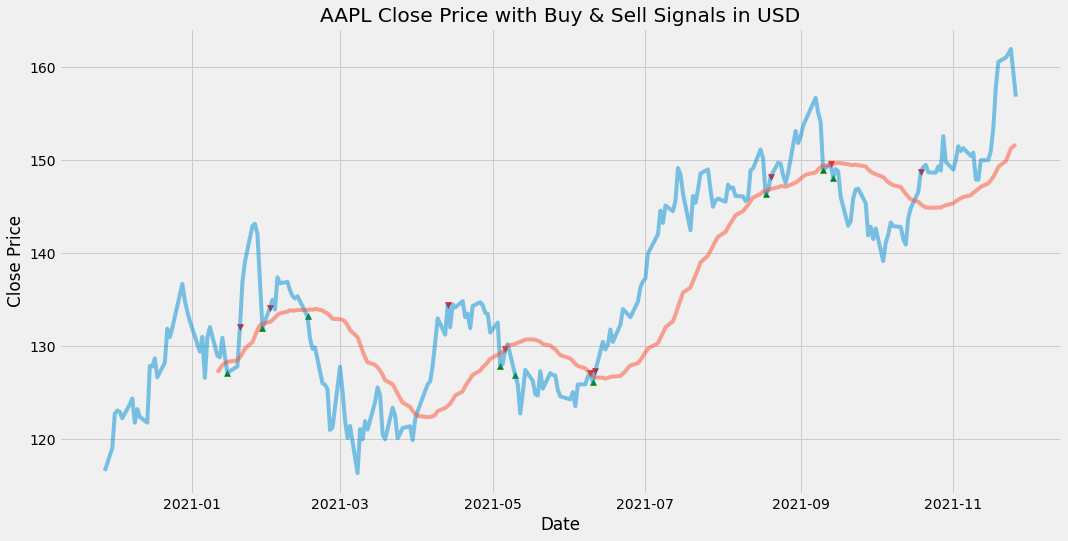

In [27]:
#Visualize data and buy and sell signals
plt.figure(figsize=(16,8))
plt.title('AAPL Close Price with Buy & Sell Signals in USD')
plt.plot(df['Close'], alpha = 0.5, label = 'Close')
plt.plot(df['SMA30'], alpha = 0.5, label = 'SMA30')
plt.scatter(df.index, df['Buy'], color = 'green', label = 'Buy Signal', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell'], color = 'red', label = 'Sell Signal', marker = 'v', alpha = 1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()